In [109]:
import ast
import numpy as np
import pandas as pd
from tqdm import tqdm
from tueplots import bundles
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.icml2022(column="full", nrows=2, ncols=1, usetex=False))
plt.rcParams.update({"figure.dpi": 1000, "font.family": "Times New Roman"})

In [110]:
research_fields = [
    'Computer Vision',
    'Robotics',
    'Bioinformatics and Computational Biology',
    'Human-Computer Interaction',
    'Design Automation of Microelectronic Systems (EDA)',
    'Visualization', 
    'Web Information Retrieval',
    'Natural Language Processing',
    'Machine Learning', 
]

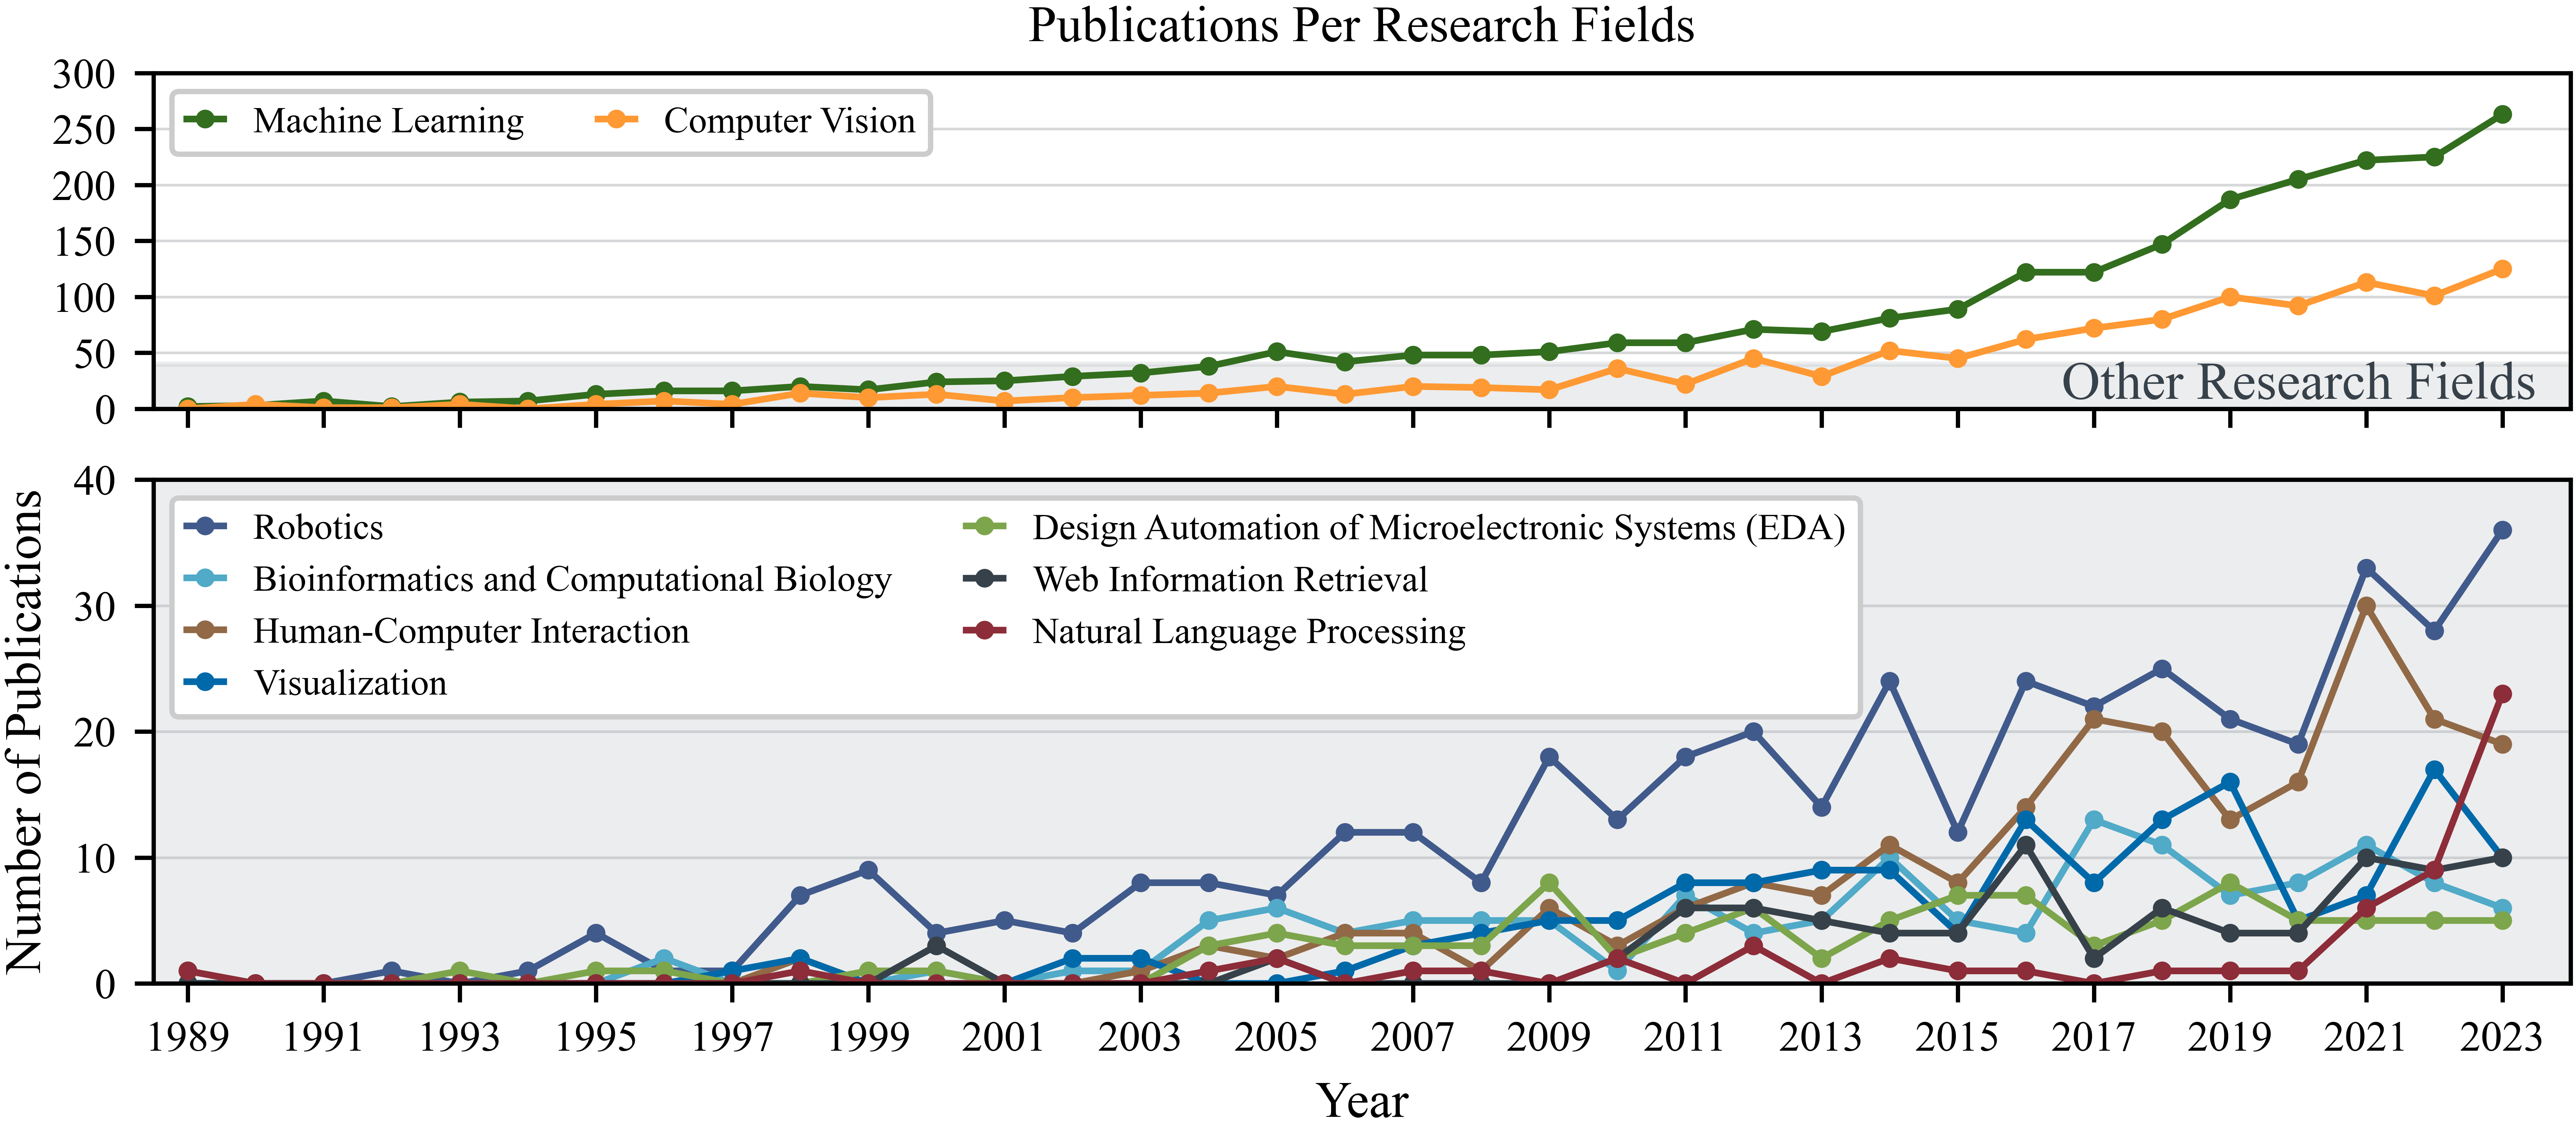

In [117]:
# Load data and filter rows with classification
df = pd.read_csv("./../../dat/ClassifiedPublications.csv")
df = df[df['Research Fields'].apply(lambda x: len(ast.literal_eval(x)) > 0)]

# Remove duplicate titles
df = df.drop_duplicates(subset='Title', keep='first')

# Create years list
years = range(df['Year'].min(), df['Year'].max() + 1)

# Calculate number of publications per year for each research field
research_field_counts = {research_field: [0] * len(years) for research_field in research_fields}
for _, row in df.iterrows():
    for field in ast.literal_eval(row['Research Fields']):
        research_field_counts[field][row['Year'] - min(years)] += 1

# Sort research fields and select colors
sorted_research_fields = ["Machine Learning", "Computer Vision", "Robotics", "Bioinformatics and Computational Biology", "Human-Computer Interaction", "Visualization", "Design Automation of Microelectronic Systems (EDA)", "Web Information Retrieval", "Natural Language Processing"]
sorted_colors = [rgb.tue_darkgreen, rgb.pn_orange, rgb.tue_darkblue, rgb.tue_lightblue, rgb.tue_brown, rgb.tue_blue, rgb.tue_green, rgb.tue_dark, rgb.tue_red]

ms, lw, alpha = 5, 1.25, 0.5

# Create subplots with 2 rows, where the second subplot has half the height of the first
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 1.5]})
fig.set_size_inches(fig.get_size_inches()[0], 3)

# Plot the first two research fields in the first subplot
ax = axs[0]
for field, color in zip(sorted_research_fields[:2], sorted_colors[:2]):
    ax.plot(years, research_field_counts[field], '.-', ms=ms, lw=lw, color=color, zorder=2, label=field)

# Add a gray rectangle spanning all years from publication count 0 to 40
ax.axvspan(years[0] - 0.5, years[-1] + 1, ymin=0, ymax=40/300, color=rgb.tue_gray, alpha=0.23, zorder=1)
ax.text(2023.5, -1, 'Other Research Fields', verticalalignment='bottom', horizontalalignment='right', color=rgb.tue_dark, fontsize=10, zorder=2)

ax.set_ylim([0, 300])
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.5, linewidth=0.5, zorder=1)
ax.tick_params(axis='both', labelsize=8)
ax.set_title('Publications Per Research Fields', fontsize=9.5)
ax.legend(loc="upper left", framealpha=1, facecolor="white", frameon=True, ncol=2, fontsize=6.9, handlelength=1)

ms, lw, alpha = 5, 1.25, 0.5

# Plot the other research fields in the second subplot
ax = axs[1]
for field, color in zip(sorted_research_fields[2:], sorted_colors[2:]):
    ax.plot(years, research_field_counts[field], '.-', ms=ms, lw=lw, color=color, zorder=2, label=field)

# Color background of second subplot to match the region of the first subplot
ax.axvspan(years[0] - 0.5, years[-1] + 1, ymin=0, ymax=40, color=rgb.tue_gray, alpha=0.23, zorder=1)

ax.set_ylim([0, 40])
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.5, linewidth=0.5, zorder=1)
ax.set_xlim([years[0] - 0.5, years[-1] + 1])
ax.set_xticks(years[::2])
ax.tick_params(axis='x', rotation=0)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Year', fontsize=9.5)
ax.set_ylabel('Number of Publications', fontsize=9.5)
ax.legend(loc="upper left", framealpha=1, facecolor="white", frameon=True, fontsize=6.9, ncol=2, handlelength=1)

#fig.text(-0.02, 0.5, 'Number of Publications', va='center', rotation='vertical', fontsize=9.5)

plt.show()

fig.savefig('./fig_PublicationsPerResearchFields.pdf')